# **Business Problem**
Can you predict the expenses based on other factors?

# **Loading the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('insurance.xlsx')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# **Data Exploration**

In [3]:
df.shape

(1338, 7)

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

**Checking unique values**

In [6]:
for col in df.columns.tolist():
  print(col, ':')
  print(df[col].unique())
  print('\n')

age :
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


sex :
['female' 'male']


bmi :
[27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30.3 16.  33.3 29.2 26.4 30.7 41.9 32.1 30.6
 18.1 39.3 36.1 22.3 26.7 23.2 38.1 22.2 38.4 29.1 22.1 26.8 30.  20.9
 17.3 34.2 25.4 40.2 24.3 42.4 19.8 30.2 29.4 27.6 20.6 21.6 40.6 48.1
 36.8 45.5 23.  22.6 37.5 38.  34.9

In [7]:
continuous = ['age', 'bmi', 'expenses']

discrete_categorical = ['sex', 'smoker', 'region']

discrete_count = ['children']

time_series = []

**Descriptive Statistics**

In [8]:
df[continuous].describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [9]:
df[discrete_categorical].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df[continuous].skew()

age         0.055673
bmi         0.284593
expenses    1.515880
dtype: float64

In [11]:
df[continuous].corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(1)

**Plots**

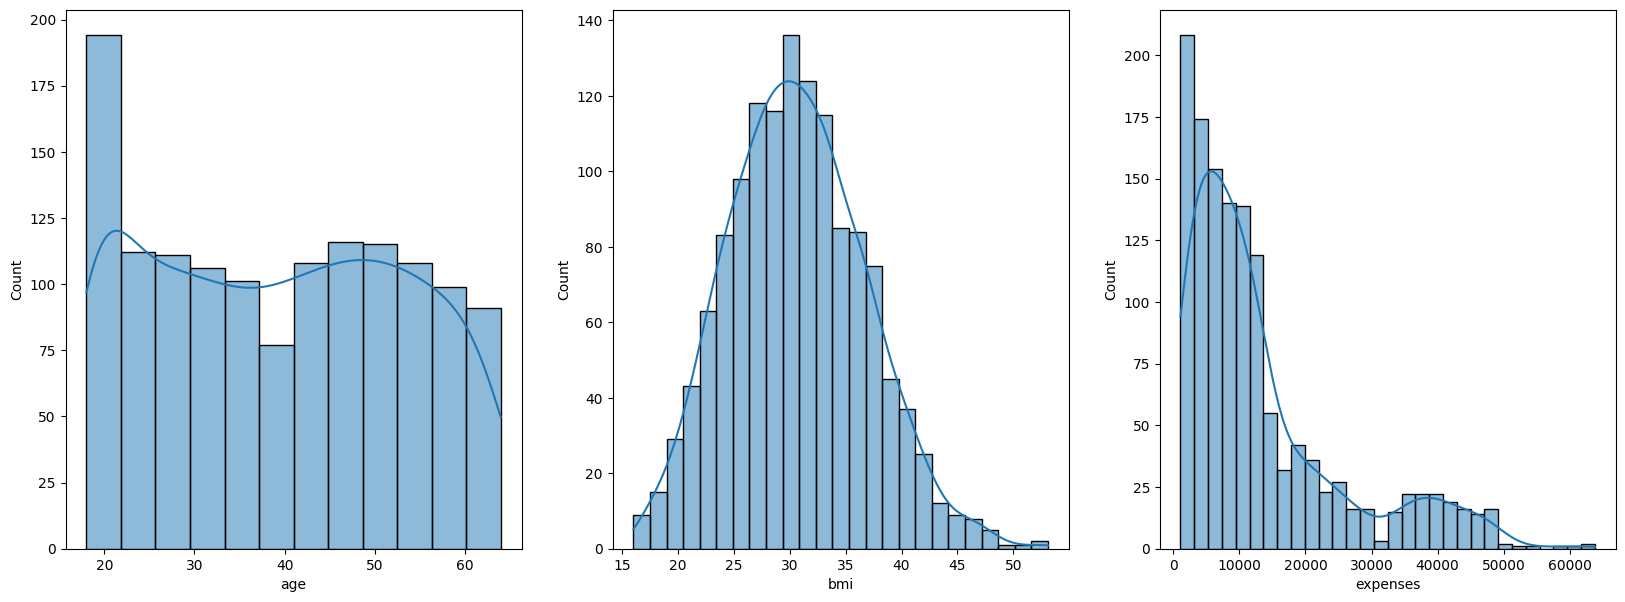

In [14]:
i = 1
plt.figure(figsize = (20, 7))
for col in continuous:
  plt.subplot(1, 3, i)
  sns.histplot(df[col], kde = True)
  i += 1
plt.show()

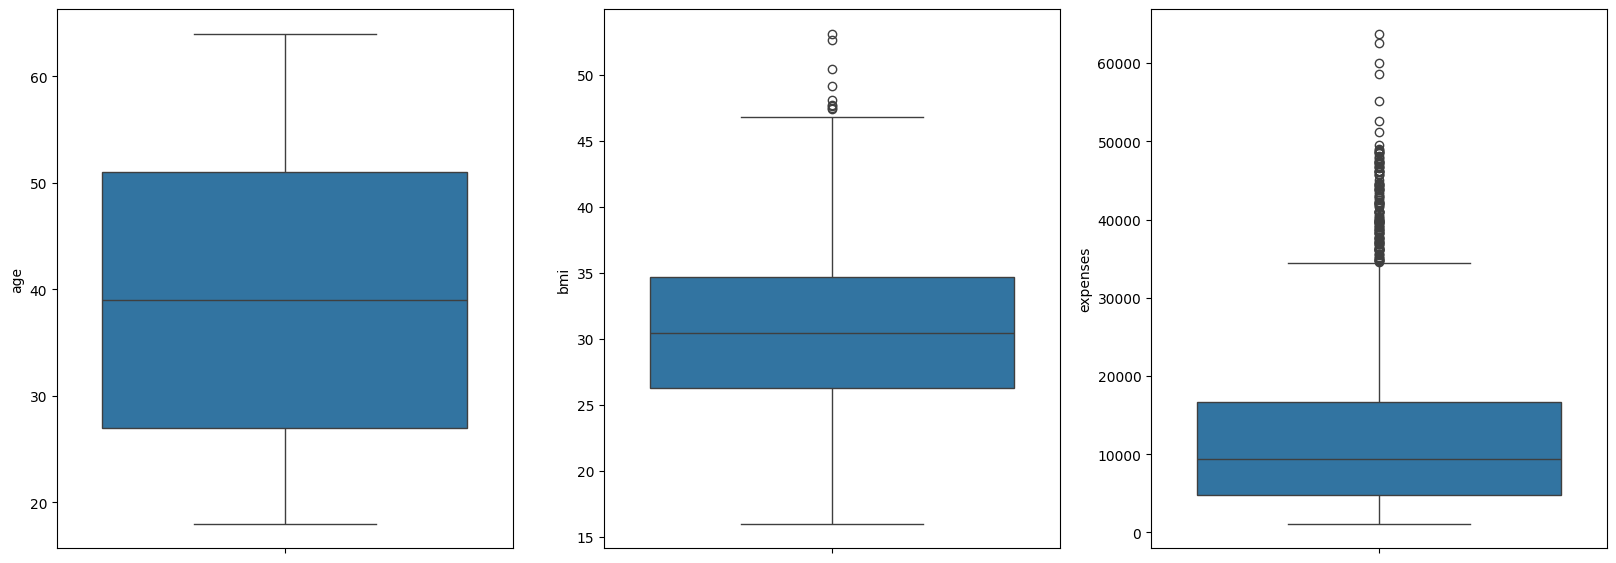

In [15]:
i = 1
plt.figure(figsize = (20, 7))
for col in continuous: 
  plt.subplot(1, 3, i)
  sns.boxplot(df[col])
  i += 1
plt.show()

**Outliers are present**

<Axes: >

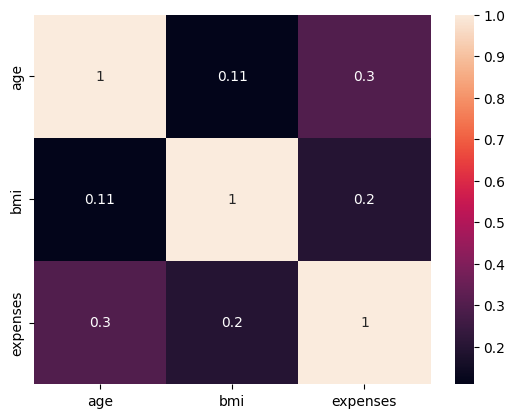

In [16]:
sns.heatmap(df[continuous].corr(), annot = True)

**1. I/P vs O/P columns should have greater correlation (|r| > 0.2) --> No columns have less correlation --> No need to drop any columns**

**2. I/P vs I/P columns should have less correlation (|r| < 0.5) --> No columns have greater correlation --> No need to drop any columns**

# **Data Preprocessing**

# **1. Data Cleaning**

**1. Treating wrong data**

No wrong data present

**2. Treating missing values**

In [17]:
df.isnull().sum() / len(df) * 100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

No missing values

**3. Treating wrong datatypes**

No wrong datatype

**4. Treating duplicates**

In [18]:
df.duplicated().sum()

np.int64(1)

In [19]:
df = df.drop_duplicates()

**5. Treating outliers**

Retaining outliers

**6. Dimension Reduction**

No need to drop any columns

# **2. Data Wrangling**

**1. Data Transformation**

In [20]:
df[continuous].skew()

age         0.054781
bmi         0.284463
expenses    1.515391
dtype: float64

**2. Encoding**

In [21]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [22]:
nominal = ['sex', 'smoker', 'region']
ordinal = []

In [23]:
df = pd.get_dummies(df)
df

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True


**3. Feature Scaling**

No need of scaling in regression projects

**Finding out if discrete I/P variables are significant or not based on AnoVa Test:**

In [24]:
df.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [25]:
from scipy.stats import f_oneway

for col in ['children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']:
  print(col, ': ', f_oneway(df[col], df['expenses']).pvalue)
  print('\n')

children :  1.4018663443507838e-275


sex_female :  1.3396084517650986e-275


sex_male :  1.3405939213326048e-275


smoker_no :  1.3703419865450153e-275


smoker_yes :  1.3105266229303377e-275


region_northeast :  1.3142386025923336e-275


region_northwest :  1.3142386025923336e-275


region_southeast :  1.3172157439675168e-275


region_southwest :  1.3143129491743292e-275




No need to drop any column, as all are significant (i.e. p < 0.05)

In [26]:
df.dtypes

age                   int64
bmi                 float64
children              int64
expenses            float64
sex_female             bool
sex_male               bool
smoker_no              bool
smoker_yes             bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [27]:
for col in ['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
            'region_southeast', 'region_southwest']:
  df[col] = df[col].astype(int)

In [28]:
df.to_csv('cleaned_Insurance.csv', index = False)

- **Finding best random state value:**

In [29]:
X = df.drop(columns = {'expenses'})
y = df['expenses']

In [30]:
RMSE_Train = []
CV = []

for i in range(1, 100):
  #Train Test Split
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

  #Modelling
  from sklearn.linear_model import LinearRegression

  model = LinearRegression()
  model.fit(X_train, y_train)

  #Prediction
  ypred_train = model.predict(X_train)

  #Evaluation
  from sklearn.metrics import mean_squared_error

  rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))

  from sklearn.model_selection import cross_val_score

  cv = abs(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error').mean())

  RMSE_Train.append(rmse_train)
  CV.append(cv)

data1 = pd.DataFrame({'RMSE_Train' : RMSE_Train, 'CV' : CV})
data2 = data1[abs(data1['RMSE_Train'] - data1['CV']) <= 0.05 * data1['RMSE_Train']]
data3 = data2[data2['CV'] == data2['CV'].max()]
rs = data3.index.tolist()[0]
rs

10